# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


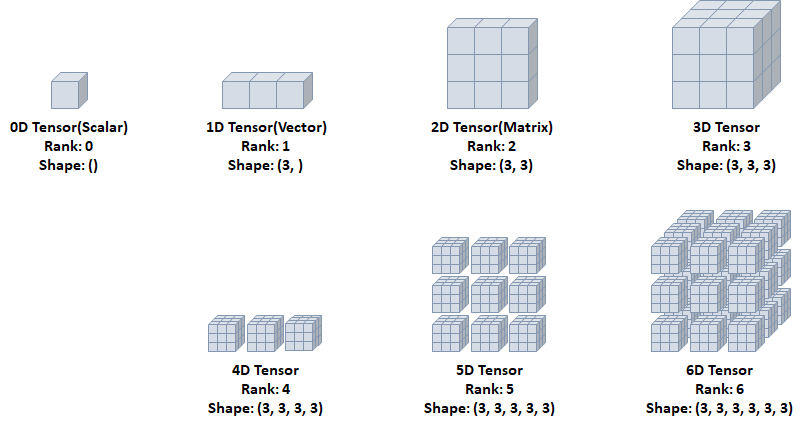

In [1]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
# 텐서 초기화와 데이터 타입
x = torch.empty(4,2)
x

tensor([[8.0700e+20, 3.0934e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 1.1362e+30]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.6897, 0.6858],
        [0.7683, 0.7736],
        [0.7341, 0.1181],
        [0.8410, 0.1225]])

In [ ]:
# 데이터 타입이 long이고 0으로 채원진 텐서
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [ ]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# 2 x 4 크기, double 탕비, 1로 채워진 텐서
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.8277, -0.4621,  1.6034,  0.0909],
        [ 0.4048, -0.0752, -0.9230,  1.4234]])


In [ ]:
# 텐서의 크기 계산
x.size()

torch.Size([2, 4])

In [ ]:
x.shape

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


A signed integer is a 32-bit datum that encodes an integer in the range [-2147483648 to 2147483647]

unsigned int는 양수만 저장한다. 때문에 부호에 비트를 사용하지 않아 저장 가능한 양수의 범위를 두 배로 늘인다. signed int보다 더 넓은 범위의 양수(0~4,294,967,295)를 표현할 수 있지만 실제 표현 가능한 개수는 음수를 포함한 signed int와 동일하다.

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [ ]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떻한 장치(cpu, gpu)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4806])
0.4805990755558014
torch.float32


In [ ]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [ ]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

tensor([1.], device='cuda:0')
tensor([0.4806], device='cuda:0')
tensor([1.4806], device='cuda:0')
tensor([1.4806], dtype=torch.float64)


In [ ]:
# 다차원 텐서 표현

#0D Tensor(Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [ ]:
# 1D Tensor
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [ ]:
# 2D Tensor
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3, 4, 5차원 텐서를 생성하여 출력하세요.

In [ ]:
# 텐서의 연산

import math
a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5,0.5))

tensor([[0.6327, 1.7405]])
tensor([[0.6327, 1.7405]])
tensor([[1., 2.]])
tensor([[0., 1.]])
tensor([[0.5000, 0.5000]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[0.6327, 1.7405]])
tensor(0.6327)
tensor(1.7405)
tensor(1.1866)
tensor(0.7833)
tensor(1.1013)
tensor([1, 2, 3])


[과제] 2차원 텐서 x,y를 생성하여 덧셈(add), 뺄셈(sub), 곱셈(mul), 나눗셈(div), 내적(matmul, mm) 연산 사례를 pytorch로 1개 이상씩 수행하세요.

In [ ]:
# Manipulations
# 인덱싱: numpy처럼 인덱싱 형태로 사용 가능
import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[:,0])
print(x[0,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor([1., 3.])
tensor([1., 2.])


In [ ]:
# view : 텐서의 크기(size)나 모양(shape)을 변경
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
print(x,'\n')
y = x.view(20)
print(y)

tensor([[ 0.1118,  0.8994,  0.3411, -0.4483, -1.3506],
        [ 0.6243,  0.0780,  0.0753, -0.0728, -1.0387],
        [ 0.2569, -0.7024, -2.0687, -1.4128, -1.1679],
        [ 1.3951, -1.9475, -0.4342, -0.9477,  0.5107]]) 

tensor([ 0.1118,  0.8994,  0.3411, -0.4483, -1.3506,  0.6243,  0.0780,  0.0753,
        -0.0728, -1.0387,  0.2569, -0.7024, -2.0687, -1.4128, -1.1679,  1.3951,
        -1.9475, -0.4342, -0.9477,  0.5107])


In [ ]:
z = x.view(5,-1)
z

tensor([[ 0.1118,  0.8994,  0.3411, -0.4483],
        [-1.3506,  0.6243,  0.0780,  0.0753],
        [-0.0728, -1.0387,  0.2569, -0.7024],
        [-2.0687, -1.4128, -1.1679,  1.3951],
        [-1.9475, -0.4342, -0.9477,  0.5107]])

In [ ]:
# [과제]
x = torch.FloatTensor([
                       [1,2],
                       [3,4],
                       [5,6],
                       [7,8]
])
print(x)
# size를 활용한 텐서 사이즈 보기

# shape를 활용한 텐서 사이즈 보기

# dim을 활용한 텐서 차원 확인

# 0 차원 사이즈 확인

# 1 차원 사이즈 확인


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [5]:
import torch
x= torch.FloatTensor([
                      [1,2],
                      [3,4],
                      [5,6],
                      [7,8]])
print(x)
#size 를 활용한 텐서 사이즈 보기
print(x.size())
#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원확인
print(x.dim())
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[1])


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
2
4
2


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.4118])
1.4117828607559204
torch.float32


In [ ]:
# 스칼라값 하나만 존재해 item() 사용 가능
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([ 0.5869, -0.4407])
torch.float32


In [ ]:
# squeeze : 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.6424, 0.5512, 0.4478],
         [0.5819, 0.2396, 0.0352],
         [0.0822, 0.2548, 0.7746]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.6424, 0.5512, 0.4478],
        [0.5819, 0.2396, 0.0352],
        [0.0822, 0.2548, 0.7746]])
torch.Size([3, 3])


In [ ]:
# unsqueeze : 차원을 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.1816, 0.7137, 0.1351],
        [0.9383, 0.4154, 0.4905],
        [0.5416, 0.0504, 0.8512]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.1816, 0.7137, 0.1351],
         [0.9383, 0.4154, 0.4905],
         [0.5416, 0.0504, 0.8512]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.1816],
         [0.7137],
         [0.1351]],

        [[0.9383],
         [0.4154],
         [0.4905]],

        [[0.5416],
         [0.0504],
         [0.8512]]])
torch.Size([3, 3, 1])


In [7]:
# stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- stack과 유사하지만 쌓을 dim이 존재해야 함
- 해당 차원을 늘려준 후 결합

In [8]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214]]])
tensor([[[-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214]],

        [[-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
torch.Size([2, 3, 3])


In [9]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040],
         [-0.4216,  0.3157,  2.4319],
         [ 0.5282, -0.7924,  1.1214],
         [-1.1744,  0.5160, -2.4418],
         [-0.4941,  1.0492, -1.5464],
         [-0.7941, -0.4478,  0.6534]]])
torch.Size([1, 6, 3])


In [10]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[ 0.2301,  0.3576,  1.5040, -1.1744,  0.5160, -2.4418],
         [-0.4216,  0.3157,  2.4319, -0.4941,  1.0492, -1.5464],
         [ 0.5282, -0.7924,  1.1214, -0.7941, -0.4478,  0.6534]]])
torch.Size([1, 3, 6])


In [12]:
# chunk : 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.7279, 0.2439, 0.0831, 0.8895, 0.1036, 0.3377],
        [0.2661, 0.9169, 0.5067, 0.4375, 0.9329, 0.4588],
        [0.4893, 0.6699, 0.4107, 0.6928, 0.8288, 0.4861]])
tensor([[0.7279, 0.2439],
        [0.2661, 0.9169],
        [0.4893, 0.6699]])
tensor([[0.0831, 0.8895],
        [0.5067, 0.4375],
        [0.4107, 0.6928]])
tensor([[0.1036, 0.3377],
        [0.9329, 0.4588],
        [0.8288, 0.4861]])


In [15]:
# split : chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.split(tensor, 2, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.0726, 0.2374, 0.6058, 0.4803, 0.4911, 0.5583],
        [0.9106, 0.8651, 0.9333, 0.5248, 0.3324, 0.9301],
        [0.9888, 0.7644, 0.4450, 0.9834, 0.6806, 0.3095]])
tensor([[0.0726, 0.2374],
        [0.9106, 0.8651],
        [0.9888, 0.7644]])
tensor([[0.6058, 0.4803],
        [0.9333, 0.5248],
        [0.4450, 0.9834]])
tensor([[0.4911, 0.5583],
        [0.3324, 0.9301],
        [0.6806, 0.3095]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [18]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)


cuda


In [19]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [21]:
print(a.to('cpu', torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [22]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [23]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [24]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a) 
print(a)
print(b) # cpu에서 메모리 공유


[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html



- requires_grad 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작. 
- 기록을 추적하는 것을 중단하게 하려면 .detach()를 호출하여 연산기록으로 부터 분리
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

requires_grad_(...)는 기존 텐성의 requires_grad 값을 바꿔치기(in-place)하여 변경

In [30]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙음
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.9636, 0.8357],
        [0.6830, 0.9029]])
tensor([[0.1787, 0.4257],
        [0.7781, 0.8655]])
tensor([[1.1423, 1.2614],
        [1.4611, 1.7684]])


In [25]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-2.1120, -0.2767, -5.9326],
        [-0.4215,  2.1590,  0.8315],
        [ 0.0253, -3.7931,  1.8881]])
False


In [28]:
a.requires_grad_(True) # _를 사용하면 inplace 연산. 
print(a.requires_grad)
b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(63.2174, grad_fn=<SumBackward0>)


In [32]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [33]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [34]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [36]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [37]:
# grad : data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [40]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [41]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [42]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [44]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [45]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [46]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [47]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [48]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [49]:
from torch.utils.data import Dataset, DataLoader

In [50]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요


In [52]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,), std=(1.0,))])


In [53]:
trainset = datasets.MNIST(root = '/content',
                          train=True, download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                         train=False, download=True,
                         transform=mnist_transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [56]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [57]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [58]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [59]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

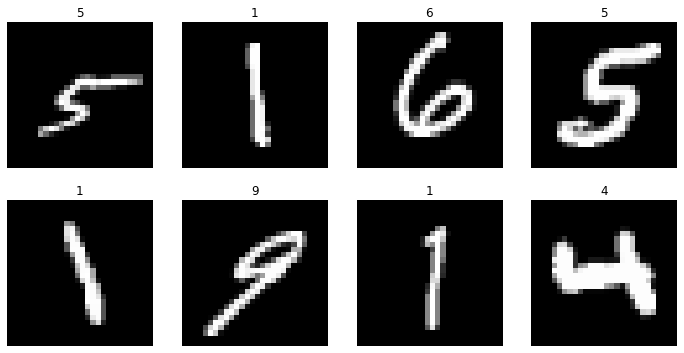

In [60]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()